In [16]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import pickle

In [19]:
patient_icd_path = "../../../large_data_files/PATIENT_ICD_BINARY.csv"
picd = pd.read_csv(patient_icd_path, sep=" ")
pdata = picd.drop("SUBJECT_ID", axis=1).to_numpy()

In [20]:
def sort_pdata(pdata, unwanted = set([])):
    icd_x_patients = pdata.T
    sorted_idx = []
    seen = set([])

    for icd_idx in tqdm(range(icd_x_patients.shape[0])):
        if icd_idx in unwanted:
            continue
        icd_row = icd_x_patients[icd_idx]
        has_icd = set(np.nonzero(icd_row)[0])
        has_icd -= seen
        sorted_idx += list(has_icd)
        seen.update(sorted_idx)
        
    icd_x_patients_sorted = pdata[sorted_idx].T
    print(len(seen))
    return icd_x_patients_sorted

100%|██████████| 6984/6984 [00:11<00:00, 632.19it/s]


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

100%|██████████| 6984/6984 [00:02<00:00, 3288.62it/s]


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

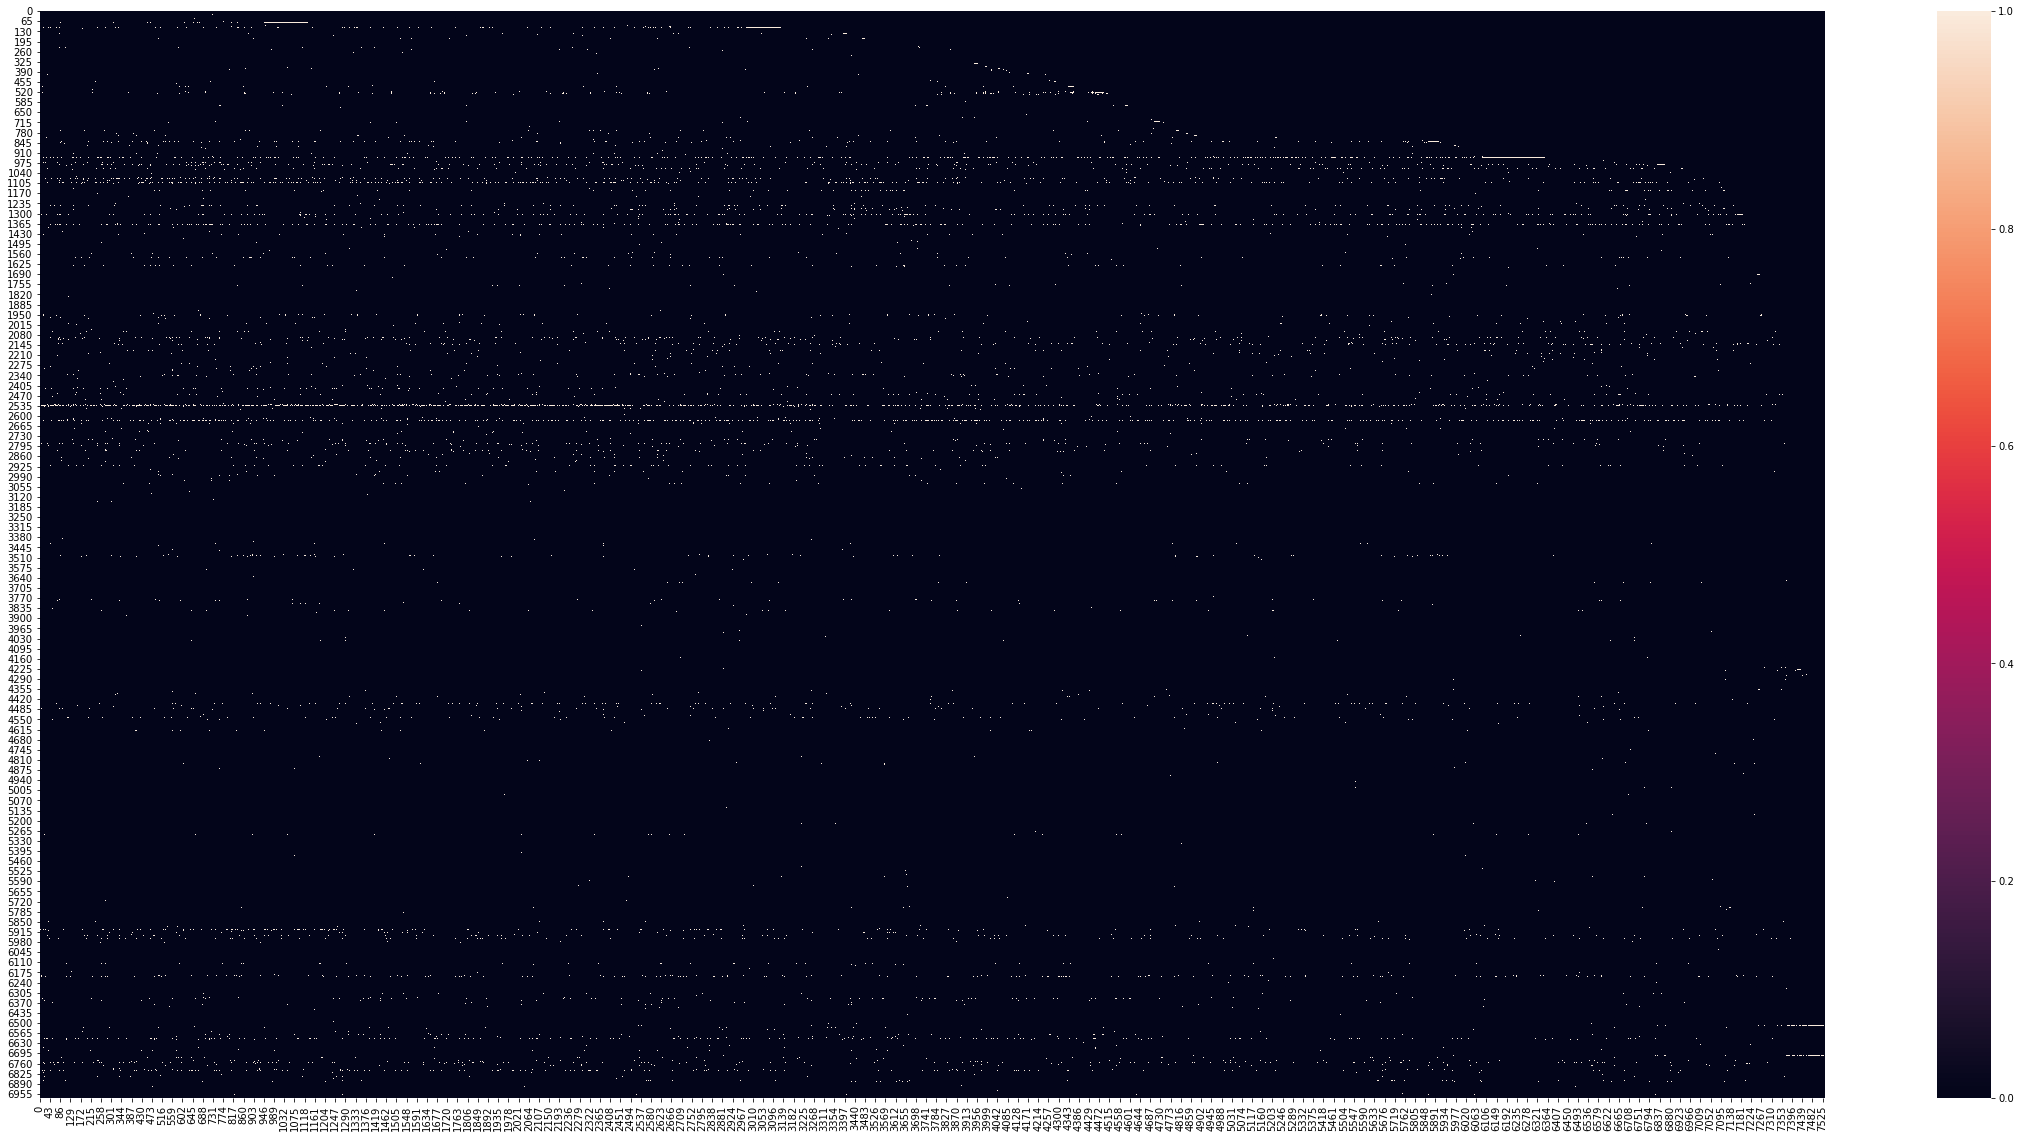

In [25]:
gt1_subject_ids_path = "../../data/PATIENT_ICD_SUBJECT_IDS_GT1_VISITS.csv"
gt1_subject_ids = pd.read_csv(gt1_subject_ids_path)
gt1_idxs = gt1_subject_ids.MATRIX_ROW_IDX.values

patient_icd_sparse_path = "./../../data/PATIENT_ICD_BINARY_SPARSE_CSR.p"
pdata_sparse = pickle.load(open(patient_icd_sparse_path, "rb"))
pdata_dense = pdata_sparse.toarray()

pdata_gt1 = pdata_dense[gt1_idxs]
pdata_gt1 = sort_pdata(pdata_gt1)

plt.figure(figsize=(40, 20))
sns.heatmap(pdata_gt1)
plt.savefig("sorted_matrix_map_freq_gt1.png")

In [ ]:
pca = PCA(n_components = 100).fit(pdata)
print(pca.explained_variance_ratio_)

In [ ]:
picd.columns[1:]

In [ ]:
pdata_p = pdata.T
pdata_p.shape
pdata_freq = np.sum(pdata_p, axis=0)
pdata_freq.shape

In [ ]:
freqs_zipped = zip(pdata_freq, picd.columns[1:])
freqs_sorted = sorted(freqs_zipped, key=lambda x: x[0], reverse=True)
freqs_sorted

In [ ]:
icd_cols = list(picd.columns[1:])
threshold = 7000
unwanted = [icd_cols.index(icd_code) for freq, icd_code in freqs_sorted if freq > threshold]
unwanted = []